In [1]:
#Necessary imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
#Creating dataset
samples = 100
centres = [[-0.5, 0.5], [0.5, -0.5]]    #2 classes with clusters around the centre points
X, y = datasets.make_blobs(n_samples=samples, random_state=2, centers=centres, cluster_std=0.4)

<function matplotlib.pyplot.show(*args, **kw)>

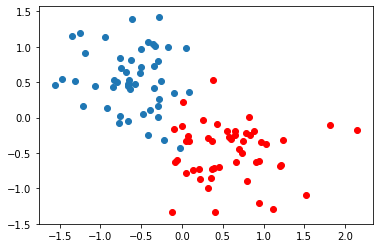

In [3]:
#Plotting the class 0 and 1 data points
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
plt.show

In [15]:
#Convert the data into tensors
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100,1))

In [25]:
class Percep(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        y_pred = self.linear(x)
        print (y_pred)
        return torch.sigmoid(y_pred)
    
def get_params():
    w,b = model.parameters()
    return w[0][0].item(), w[0][1].item(), b[0].item()

def plot_compare():
    w1,w2,b = get_params()
    x = np.array([-2,2])
    y = w1*x1 + w2*x2 + b
    plt.plot(x,y,'r')
    plt.scatter(X,Y)
    plt.show()
    
def plot_fit():
    w1,w2,b = get_params()
    x1 = np.array([-2,2])
    x2 = (w1*x1 + b)/-w2
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
    plt.plot(x1, x2, c='g')
    plt.show()
    

In [17]:
model = Percep(2,1)

In [18]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

In [19]:
epoch = 500
losses = []
for i in range(epoch):
    y_pred = model.forward(x_data.float())
    loss = criterion(y_pred, y_data.float())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)

tensor([[ 0.0313],
        [ 0.0891],
        [ 0.0560],
        [ 0.0896],
        [-0.3472],
        [-0.1065],
        [ 0.2982],
        [-0.4724],
        [ 0.4215],
        [-0.2566],
        [-0.3963],
        [-1.0579],
        [ 0.0206],
        [-0.3624],
        [ 0.0946],
        [-0.3227],
        [-0.0987],
        [-0.2258],
        [ 0.0966],
        [ 0.2960],
        [-0.3255],
        [-0.0818],
        [ 0.0169],
        [-0.2668],
        [-0.4582],
        [-0.0601],
        [-0.0100],
        [ 0.3223],
        [ 0.1066],
        [-0.3149],
        [-0.3326],
        [-0.0222],
        [ 0.3208],
        [ 0.0191],
        [ 0.1254],
        [-0.0076],
        [-0.1995],
        [-0.5604],
        [-0.4886],
        [-0.4029],
        [ 0.4536],
        [-0.1145],
        [-0.0552],
        [-0.1439],
        [ 0.5505],
        [-0.3815],
        [-0.3755],
        [ 0.1892],
        [-0.0632],
        [-0.1695],
        [-0.0084],
        [-0.0120],
        [-0.

tensor([[-0.8345],
        [-0.8926],
        [-0.1182],
        [ 0.1485],
        [ 0.2805],
        [-1.2865],
        [-1.2980],
        [ 0.1734],
        [-0.7895],
        [ 0.6242],
        [ 0.6874],
        [ 0.6594],
        [-0.2437],
        [ 0.4159],
        [ 0.4370],
        [ 1.2662],
        [ 0.6252],
        [-0.8641],
        [-0.7188],
        [-0.1816],
        [-0.7975],
        [-0.6974],
        [ 1.1073],
        [-1.2193],
        [ 0.3480],
        [-0.9299],
        [ 0.8273],
        [-0.6619],
        [-0.6214],
        [ 0.4969],
        [ 0.3273],
        [ 0.5910],
        [-0.3875],
        [-0.6666],
        [-0.5222],
        [-0.7301],
        [ 0.0623],
        [ 1.2130],
        [ 0.5299],
        [ 0.3393],
        [-0.4858],
        [-0.3361],
        [ 0.2415],
        [ 0.6279],
        [-0.8115],
        [-0.3562],
        [ 0.6956],
        [-0.6751],
        [ 0.7197],
        [ 0.2755],
        [-0.3174],
        [-0.4526],
        [ 0.

tensor([[-1.4180],
        [-1.5545],
        [-0.2366],
        [ 0.1866],
        [ 0.7049],
        [-2.0801],
        [-2.3751],
        [ 0.6110],
        [-1.6084],
        [ 1.2181],
        [ 1.4191],
        [ 1.8228],
        [-0.4225],
        [ 0.9417],
        [ 0.6658],
        [ 2.3370],
        [ 1.1121],
        [-1.2923],
        [-1.2689],
        [-0.5062],
        [-1.1131],
        [-1.1116],
        [ 1.8399],
        [-1.8585],
        [ 0.8935],
        [-1.5153],
        [ 1.3898],
        [-1.3275],
        [-1.1128],
        [ 1.0449],
        [ 0.7733],
        [ 1.0028],
        [-0.8674],
        [-1.1287],
        [-0.9597],
        [-1.2168],
        [ 0.2393],
        [ 2.4099],
        [ 1.2185],
        [ 0.8412],
        [-1.1224],
        [-0.4850],
        [ 0.4409],
        [ 1.1475],
        [-1.7332],
        [-0.3368],
        [ 1.4186],
        [-1.2589],
        [ 1.2462],
        [ 0.5756],
        [-0.5259],
        [-0.7496],
        [ 0.

tensor([[-1.7874],
        [-1.9736],
        [-0.3134],
        [ 0.2081],
        [ 0.9720],
        [-2.5811],
        [-3.0567],
        [ 0.8872],
        [-2.1282],
        [ 1.5915],
        [ 1.8799],
        [ 2.5590],
        [-0.5371],
        [ 1.2727],
        [ 0.8074],
        [ 3.0108],
        [ 1.4173],
        [-1.5626],
        [-1.6176],
        [-0.7141],
        [-1.3119],
        [-1.3738],
        [ 2.2991],
        [-2.2614],
        [ 1.2374],
        [-1.8854],
        [ 1.7420],
        [-1.7502],
        [-1.4246],
        [ 1.3897],
        [ 1.0540],
        [ 1.2603],
        [-1.1732],
        [-1.4217],
        [-1.2378],
        [-1.5251],
        [ 0.3499],
        [ 3.1645],
        [ 1.6526],
        [ 1.1574],
        [-1.5275],
        [-0.5800],
        [ 0.5647],
        [ 1.4735],
        [-2.3183],
        [-0.3244],
        [ 1.8738],
        [-1.6293],
        [ 1.5760],
        [ 0.7635],
        [-0.6591],
        [-0.9384],
        [ 0.

tensor([[-2.1279],
        [-2.3601],
        [-0.3859],
        [ 0.2255],
        [ 1.2177],
        [-3.0411],
        [-3.6853],
        [ 1.1421],
        [-2.6094],
        [ 1.9339],
        [ 2.3035],
        [ 3.2400],
        [-0.6439],
        [ 1.5772],
        [ 0.9348],
        [ 3.6292],
        [ 1.6960],
        [-1.8103],
        [-1.9396],
        [-0.9085],
        [-1.4934],
        [-1.6152],
        [ 2.7181],
        [-2.6303],
        [ 1.5544],
        [-2.2259],
        [ 2.0633],
        [-2.1417],
        [-1.7129],
        [ 1.7063],
        [ 1.3120],
        [ 1.4948],
        [-1.4575],
        [-1.6920],
        [-1.4952],
        [-1.8092],
        [ 0.4511],
        [ 3.8586],
        [ 2.0525],
        [ 1.4485],
        [-1.9039],
        [-0.6680],
        [ 0.6770],
        [ 1.7716],
        [-2.8604],
        [-0.3119],
        [ 2.2921],
        [-1.9719],
        [ 1.8771],
        [ 0.9353],
        [-0.7828],
        [-1.1131],
        [ 1.

tensor([[-2.3527],
        [-2.6153],
        [-0.4348],
        [ 0.2354],
        [ 1.3801],
        [-3.3435],
        [-4.1007],
        [ 1.3113],
        [-2.9287],
        [ 2.1593],
        [ 2.5830],
        [ 3.6923],
        [-0.7152],
        [ 1.7782],
        [ 1.0168],
        [ 4.0361],
        [ 1.8786],
        [-1.9726],
        [-2.1526],
        [-1.0388],
        [-1.6116],
        [-1.7743],
        [ 2.9921],
        [-2.8720],
        [ 1.7642],
        [-2.4501],
        [ 2.2733],
        [-2.4016],
        [-1.9038],
        [ 1.9151],
        [ 1.4823],
        [ 1.6479],
        [-1.6470],
        [-1.8706],
        [-1.6659],
        [-1.9968],
        [ 0.5177],
        [ 4.3166],
        [ 2.3169],
        [ 1.6410],
        [-2.1547],
        [-0.7260],
        [ 0.7500],
        [ 1.9673],
        [-3.2205],
        [-0.3025],
        [ 2.5680],
        [-2.1990],
        [ 2.0742],
        [ 1.0481],
        [-0.8649],
        [-1.2287],
        [ 1.

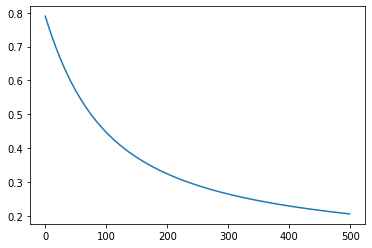

In [20]:
#Error as our training proceeded
plt.plot(range(epoch), losses)

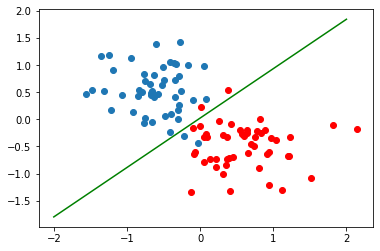

In [26]:
#Plotting our trained classifier
plot_fit()